## Load Data

In [1]:
import torch


device = 'cuda' if torch.cuda.is_available() else 'cpu'

<Axes: >

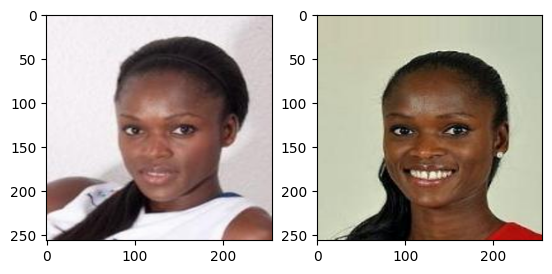

In [2]:
from matplotlib import pyplot as plt
from face_identifier.dataset import read_identities, IdentityDataSet, draw_tensor_image, split_train_valid_test


# paths
path = '/home/anthony/Documents/Homework Documents/Inno Lab Group Project/'
path_anno = path + 'identity_CelebA.txt'
path_images = path + 'img_align_celeba'

# read data
data = read_identities(path_anno)
training_index, validation_index, test_index = split_train_valid_test(data)
training_set = IdentityDataSet(data, path_images, training_index)
val_set = IdentityDataSet(data, path_images, validation_index)
test_set = IdentityDataSet(data, path_images, test_index)

# show images
fig, (ax1, ax2) = plt.subplots(1, 2)
img1, img2 = training_set[0]
draw_tensor_image(img1, ax1)
draw_tensor_image(img2, ax2)

## Build Model

In [3]:
from face_identifier.model import FaceIdentifier


model = FaceIdentifier()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
model

FaceIdentifier(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

## Train Model

In [ ]:
from face_identifier.processes import ModelTrainer, test


trainer = ModelTrainer(model, training_set, val_set, optimizer, device=device, batch_size=20)
trainer.train(10)

Valing:  39%|█████████████▎                    | 40/102 [00:15<00:24,  2.58it/s]